# Evaluate a Change to Featured Snippets

Measure impact of a recents change to featured snippets on Wikipedia traffic.

"Jan 22, 2020, Google rolled out a significant update to the first page of search results. Web pages in a featured snippet position will no longer be repeated in regular organic listings."


https://www.business2community.com/seo/no-more-double-dipping-on-featured-snippets-does-it-matter-02280407

In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(wmf);library(RColorBrewer);library(stringr);
})

### Overall pageviews before & after the change

In [68]:
pageviews_query = "
    SELECT 
        CONCAT(year,'-',LPAD(month,2,'0'),'-',LPAD(day,2,'0')) AS date,
        access_method,
        SUM(view_count) AS pageviews,
        year, month, day
    FROM 
        wmf.pageview_hourly
    WHERE ((year = 2019 and month in (1,2,10,11,12)) or (year = 2018 and month in (10,11,12)) or year = 2020)
        AND agent_type = 'user'
        AND NOT (
            country_code IN ('PK', 'IR', 'AF')
            AND user_agent_map['browser_family'] = 'IE' AND user_agent_map['browser_major'] = 7
        )
        AND referer_class = 'external (search engine)'
        AND page_id IS NOT NULL
        AND namespace_id = 0
        AND project like '%wikipedia%'
    GROUP BY year, month, day, access_method
"

In [69]:
pageviews_all = wmf::query_hive(pageviews_query)

In [70]:
pageviews_all$date <- as.Date(pageviews_all$date, format = "%Y-%m-%d")

In [71]:
pageviews_all_mobile <- pageviews_all %>%
    filter(access_method == 'mobile web') %>%
    filter(date < '2020-02-27')

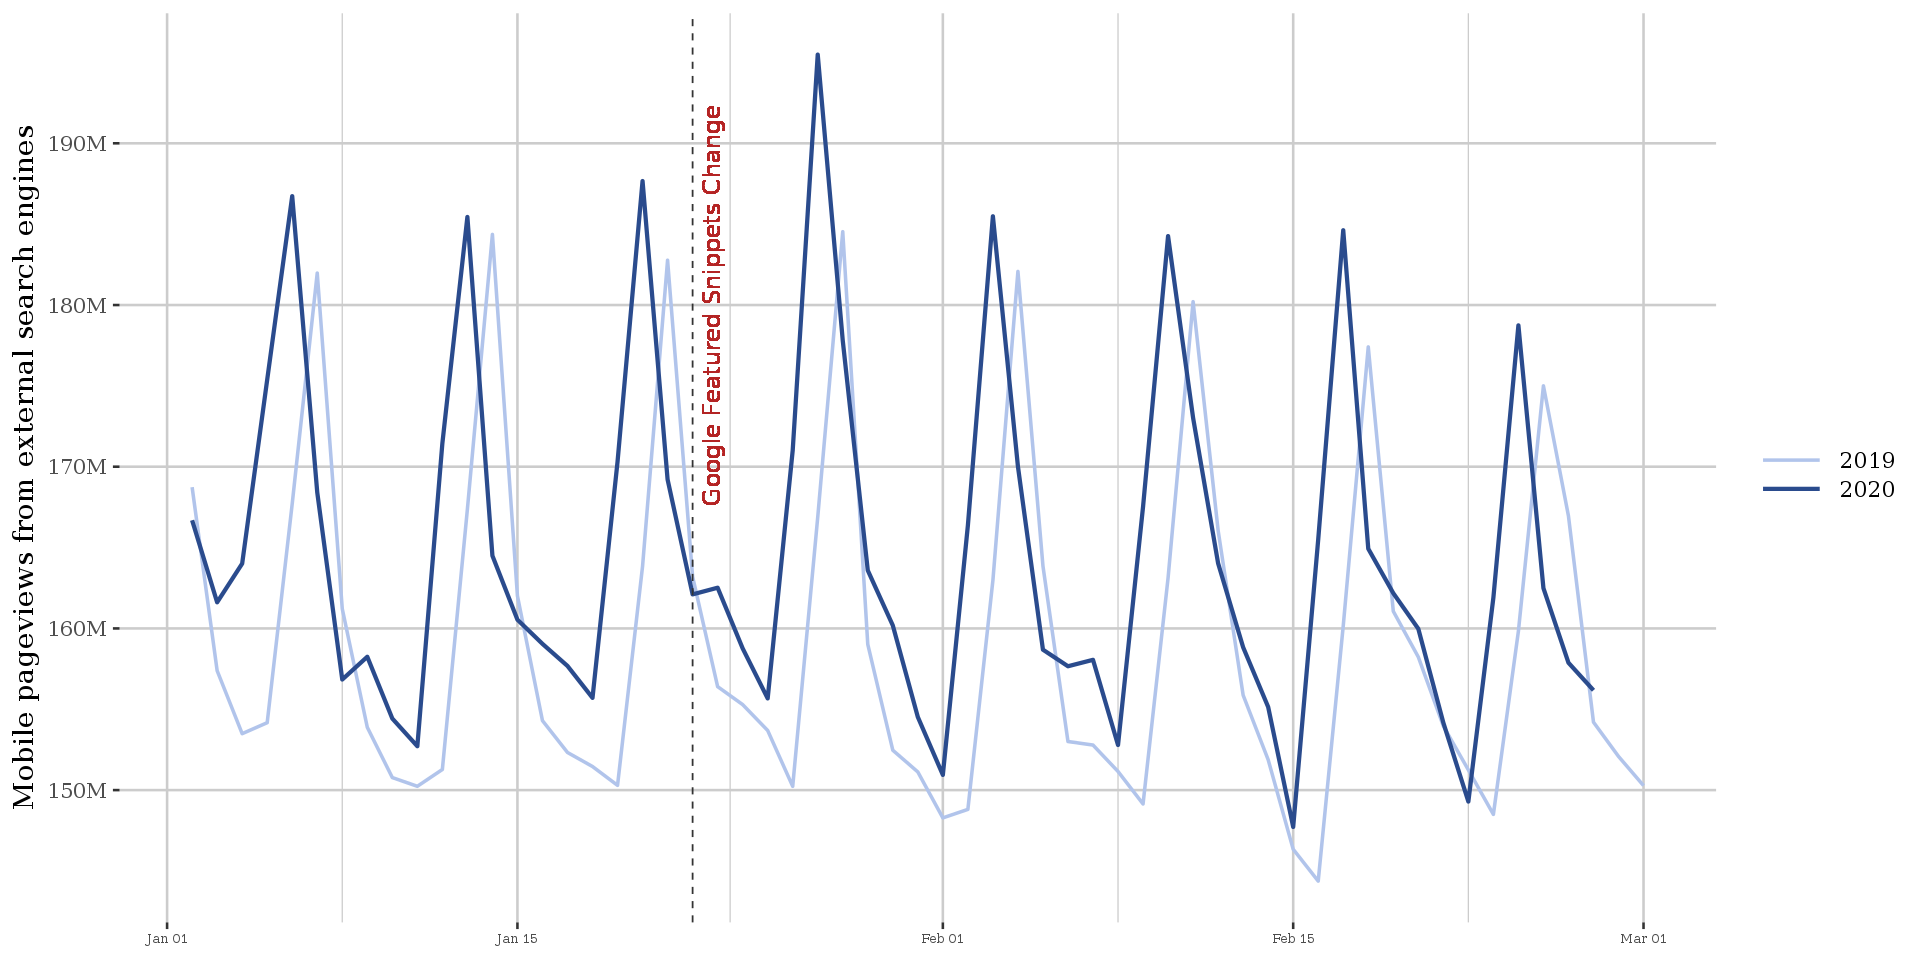

In [72]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- ggplot(pageviews_all_mobile, aes(x = as.Date(yday(date), "1970-01-01"),y = pageviews, group=year, color = as.factor(year), size = as.factor(year))) +  
    geom_line() +
    scale_linetype_manual(values=c( "dashed","solid")) +
    scale_size_manual(values = c(1,1.2)) +
    scale_color_manual(values = c("2019"= "#b1c4eb", "2020" = "#2a4b8d")) +
    geom_vline(xintercept = as.numeric(as.Date('1970-01-22')), linetype = "dashed", color = "gray20") +
    geom_text(aes(x=as.Date('1970-01-22'), y=18E7 ,label="Google Featured Snippets Change"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_y_continuous("Mobile pageviews from external search engines",
                       labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0.5,size = 8),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( vjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))

p

In [73]:
pageviews_all_desktop <- pageviews_all %>%
    filter(access_method == 'desktop') %>%
    filter(date < '2020-02-27')
    

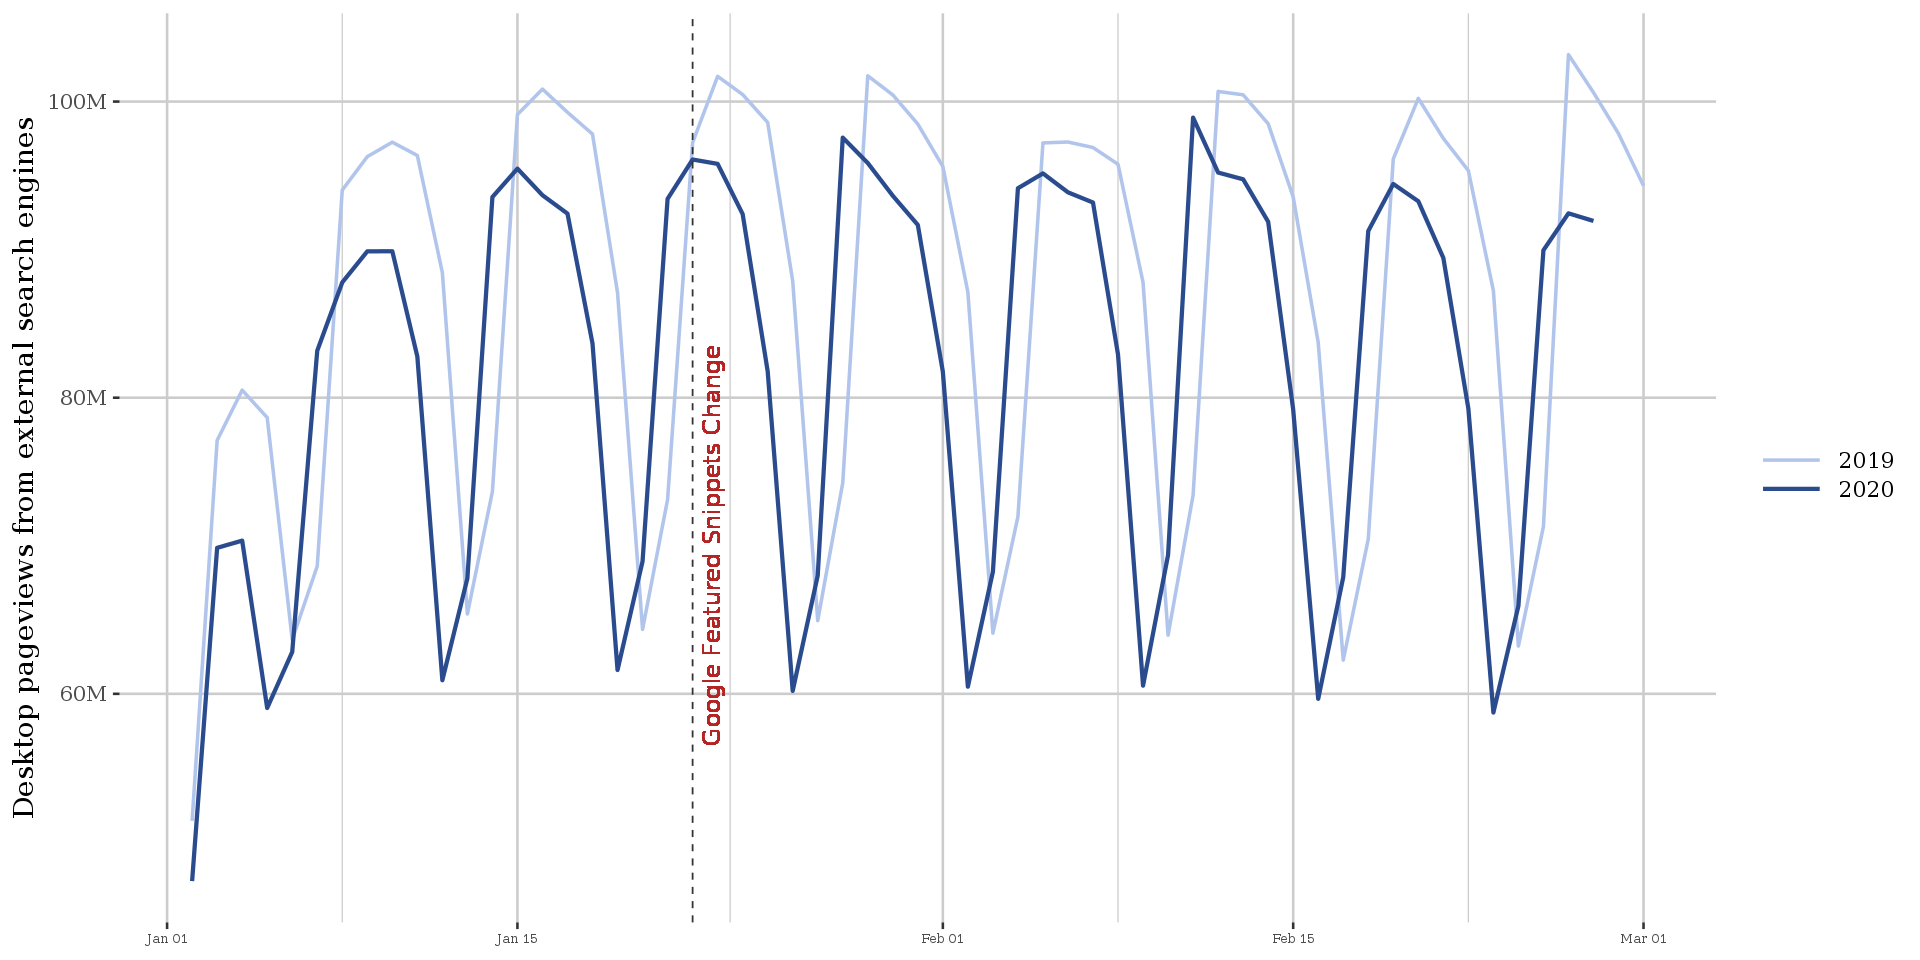

In [74]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- ggplot(pageviews_all_desktop, aes(x = as.Date(yday(date), "1970-01-01"),y = pageviews, group=year, color = as.factor(year), size = as.factor(year))) +  
    geom_line() +
    scale_linetype_manual(values=c( "dashed","solid")) +
    scale_size_manual(values = c(1,1.2)) +
    scale_color_manual(values = c("2019"= "#b1c4eb", "2020" = "#2a4b8d")) +
    geom_vline(xintercept = as.numeric(as.Date('1970-01-22')), linetype = "dashed", color = "gray20") +
    geom_text(aes(x=as.Date('1970-01-22'), y=7E7 ,label="Google Featured Snippets Change"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_y_continuous("Desktop pageviews from external search engines",
                       labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0.5,size = 8),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))

p

### Pageviews before & after the change in English Wikipedia

In [2]:
pageviews_en_query = "
    SELECT 
        CONCAT(year,'-',LPAD(month,2,'0'),'-',LPAD(day,2,'0')) AS date,
        access_method,
        SUM(view_count) AS pageviews,
        year, month, day
    FROM 
        wmf.pageview_hourly
     WHERE ((year = 2019 and month in (1,2,10,11,12)) or (year = 2018 and month in (10,11,12)) or year = 2020)
        AND agent_type = 'user'
        AND NOT (
            country_code IN ('PK', 'IR', 'AF')
            AND user_agent_map['browser_family'] = 'IE' AND user_agent_map['browser_major'] = 7
        )
        AND referer_class = 'external (search engine)'
        AND page_id IS NOT NULL
        AND namespace_id = 0
        AND project = 'en.wikipedia'
    GROUP BY year, month, day, access_method
"

In [3]:
pageviews_en = wmf::query_hive(pageviews_en_query)

In [5]:
pageviews_en$date <- as.Date(pageviews_en$date, format = "%Y-%m-%d")

In [25]:
pageviews_en_mobile <- pageviews_en %>%
    filter(access_method == 'mobile web') %>%
    filter(date <= '2020-02-29') %>%
    mutate(fy = ifelse(date <'2019-07-01','FY 2018/19','FY 2019/20')) %>%
    arrange(date) %>%
    group_by(fy) %>% 
    mutate(time=seq(1:n()))


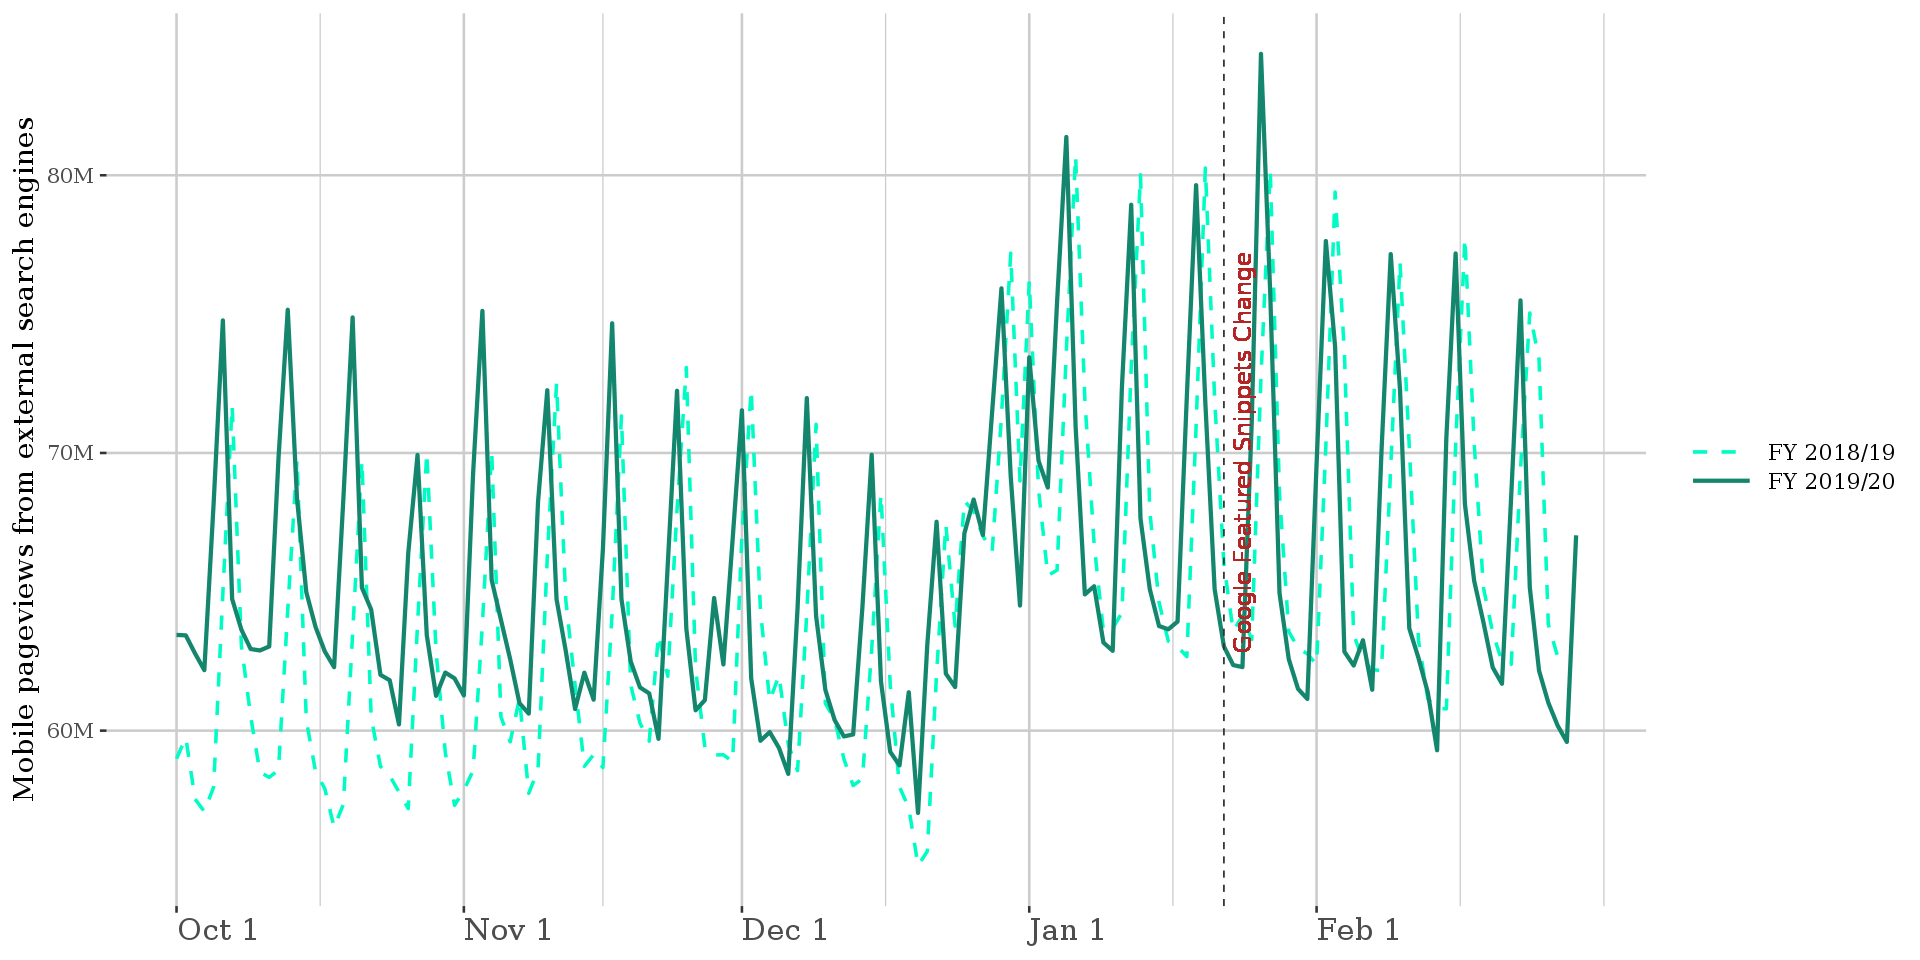

In [36]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageviews_en_mobile %>%
    ggplot(.) +
    geom_path(aes(x = time, y = pageviews, group= fy, color = fy,size=fy,linetype = fy)) +
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_size_manual(values = c(1,1.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5","FY 2019/20" = "#14866d")) +
    geom_vline(xintercept = 114, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=114, y=7E7, label="Google Featured Snippets Change"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_y_continuous("Mobile pageviews from external search engines",
                       labels = polloi::compress) +
    scale_x_continuous(breaks = c(1,32,62,93,124),labels=c('Oct 1','Nov 1','Dec 1','Jan 1','Feb 1')) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))

p

In [31]:
pageviews_en_desktop <- pageviews_en %>%
    filter(access_method == 'desktop') %>%
    filter(date <= '2020-02-29') %>%
    mutate(fy = ifelse(date <'2019-07-01','FY 2018/19','FY 2019/20')) %>%
    arrange(date) %>%
    group_by(fy) %>% 
    mutate(time=seq(1:n()))
    

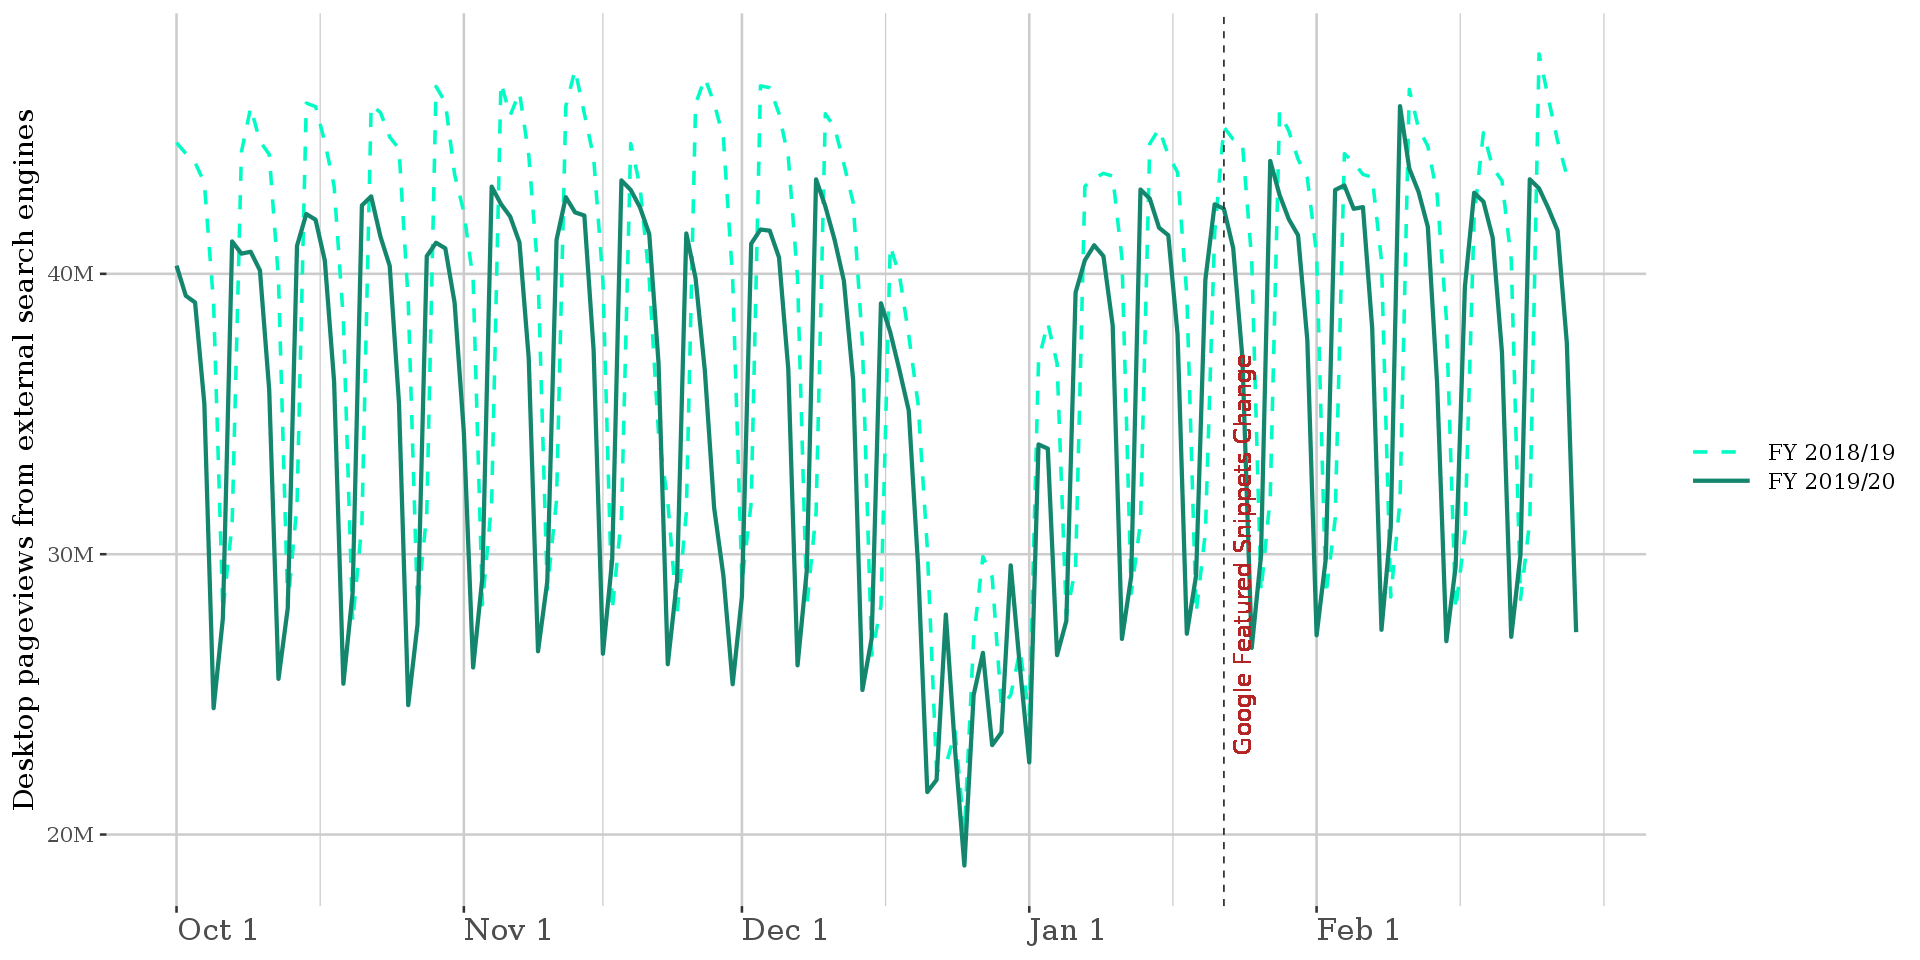

In [38]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageviews_en_desktop %>%
    ggplot(.) +
    geom_path(aes(x = time, y = pageviews, group= fy, color = fy,size=fy,linetype = fy)) +
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_size_manual(values = c(1,1.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5","FY 2019/20" = "#14866d")) +
    geom_vline(xintercept = 114, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=114, y=3E7, label="Google Featured Snippets Change"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_y_continuous("Desktop pageviews from external search engines",
                       labels = polloi::compress) +
    scale_x_continuous(breaks = c(1,32,62,93,124),labels=c('Oct 1','Nov 1','Dec 1','Jan 1','Feb 1')) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))

p

### English Wikipedia Top Pages in Featured Snippet

In [83]:
top_pages = read.csv( "en.wikipedia.org-organic-keywords-subdomains-US-03-Mar-2020_05-30-19.csv", header = TRUE)

In [84]:
head(top_pages)

,number,Keyword,Position,Position.History,Position.History.Date,Volume,URL,Traffic..desc.,Page.URL.inside
,<int>,<fct>,<int>,<int>,<lgl>,<int>,<fct>,<int>,<fct>
1,1,impeachment,1,1,NA,1140000,https://en.wikipedia.org/wiki/Impeachment,110958,Featured snippet
2,2,copypasta,1,1,NA,82000,https://en.wikipedia.org/wiki/Copypasta,49781,Featured snippet
3,3,incel,1,1,NA,275000,https://en.wikipedia.org/wiki/Incel,48575,Featured snippet
4,4,linus tech tips,1,1,NA,87000,https://en.wikipedia.org/wiki/Linus_Sebastian,41183,Featured snippet
5,5,normal distribution,1,1,NA,93000,https://en.wikipedia.org/wiki/Normal_distribution,32271,Featured snippet
6,6,dunning kruger effect,1,1,NA,124000,https://en.wikipedia.org/wiki/Dunning–Kruger_effect,31990,Featured snippet


In [88]:
top_snippet <- top_pages %>%
    select (Keyword, URL) %>%
    mutate (page_name = str_match(URL, "(?<=wiki/).*$"))

### Top Pages in English Wikipedia

In [2]:
top_pages_query = "
WITH v AS (
    SELECT page_id, SUM(view_count) AS pageviews
    FROM wmf.pageview_hourly
    WHERE year in (2020)
        AND month in (1, 2)
        AND agent_type = 'user'
        AND project = 'en.wikipedia'
        AND NOT (
            country_code IN ('PK', 'IR', 'AF')
            AND user_agent_map['browser_family'] = 'IE' AND user_agent_map['browser_major'] = 7
        )
        AND referer_class = 'external (search engine)'
        AND page_id IS NOT NULL
        AND namespace_id = 0
    GROUP BY page_id
    LIMIT 10000000
), p AS (
    SELECT page_id, page_title, page_latest
    FROM wmf_raw.mediawiki_page
    WHERE wiki_db = 'enwiki'
    AND snapshot = '2020-01'
    AND page_id IS NOT NULL
    AND page_namespace = 0
    AND NOT page_is_redirect
)

SELECT v.page_id, p.page_title, v.pageviews
FROM v LEFT JOIN p ON v.page_id=p.page_id
"

In [3]:
top_pages = wmf::query_hive(top_pages_query)

In [96]:
top_100_pages <- top_pages %>%
    arrange(desc(pageviews)) 

Check several pages from top 100 pages in English wikipedia, most of them are related to persons or movies which will be in knowledge panels or movie snippets instead of featured snippets. Reviewing top pages might not be a efficient way to go.